Informe de análisis estadístico de teléfonos móviles



1. Introducción: En este informe, se presenta un análisis estadístico detallado utilizando herramientas de Python como NumPy, Pandas y Matplotlib. Los datos seleccionados corresponden a un conjunto extraído de Kaggle, titulado Amazon Phone, que contiene información sobre precios, calificaciones y estadísticas de ventas de teléfonos móviles vendidos en Amazon.

El objetivo de este análisis es explorar tendencias clave y patrones relevantes en las ventas y calificaciones de los productos.

In [ ]:
#2. Importacion de librerias

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#3. Cargue y muestra de datos del archivo csv

df = pd.read_csv('phone_search.csv')
# Mostrar las primeras filas y columnas
print(df.head()) #Muestra las primeras 5 filas
print(df.columns)

In [ ]:
#4. Análisis de calificaciones

# Agrupar por calificación de estrellas y contar numero de calificaciones
print("Calificación/Cantidad de productos con esa calificación")
ratings_count = df.groupby('product_star_rating')['asin'].count()
print(ratings_count)

Análisis mediante graficos, para identificar visualmente los productos que tuvieron mejor calificación

In [ ]:
#Grafico de barras de calificacion de productos

# Convertir 'product_price' a tipo numérico
df['product_price'] = df['product_price'].replace({r'\$': '', r',': ''}, regex=True).astype(float)

# Gráfico de barras de productos por calificación
ratings_count.plot(kind='bar')
plt.title('Número de Productos por Calificación de Estrellas')
plt.xlabel('Calificación de Estrellas')
plt.ylabel('Número de Productos')
plt.show()


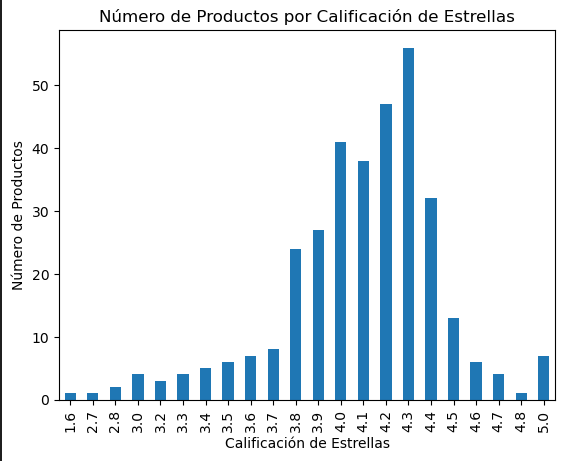


Distribución de Calificaciones de Estrellas

La mayoría de los productos se agrupan en las calificaciones de 4 y 4.5 estrellas, lo cual sugiere que los usuarios tienden a evaluar positivamente los productos en el conjunto de datos. Es notable que hay una menor cantidad de productos con calificaciones de 3 estrellas o menos, lo que podría indicar que los productos de menor calidad son menos comunes o menos populares.

Este patrón puede reflejar la tendencia general en plataformas de ventas en línea, donde los productos con mejores calificaciones tienden a ser más visibles y obtener más ventas.

In [ ]:
#5. Análisis de precios

#Histograma de precios
plt.figure(figsize=(8, 6))
sns.histplot(df['product_price'], bins=20, kde=True)
plt.title('Distribución de Precios de Productos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

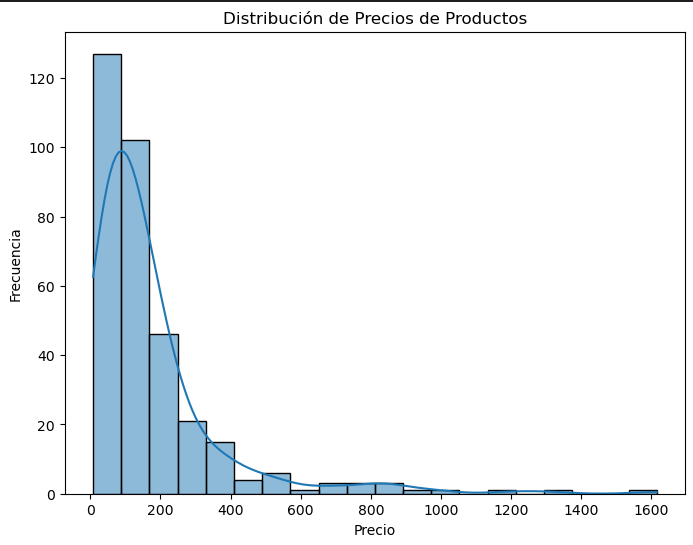

 Distribución de Precios
 
El análisis del histograma de precios muestra que la mayoría de los productos están dentro de un rango de precios accesible, concentrándose principalmente entre los $50 y $150. Pocos productos superan los $500, lo cual es esperable si se tiene en cuenta que el dataset incluye teléfonos móviles de gamas baja y media. Los productos más caros pueden pertenecer a modelos de gamas más altas o con características especiales, pero son significativamente menos comunes.


In [ ]:
#6. Análisis del producto más calificado

# Producto con mayor número de calificaciones
producto_mas_calificado = df.loc[df['product_num_ratings'].idxmax()]
print(f"Producto más calificado: {producto_mas_calificado['product_title']} con {producto_mas_calificado['product_num_ratings']} calificaciones.")

El producto con más calificaciones fue el Apple iPhone XR, 64GB, Black - Unlocked (Renewed) con 64977 calificaciones. Este producto probablemente se encuentra en una categoría de alta demanda o bien es muy popular entre los usuarios debido a su relación calidad-precio. Su calificación de estrellas también es alta (4.2)

Creación de una nueva columna, que está basada el precio original y el precio actual, mostrando un descuento en los productos o un cambio en el precio de su valor original

In [ ]:
#7. Nueva columna, titulada discount (descuento)

df['discount'] = ((df['product_original_price'].replace({r'\$': '', r',': ''}, regex=True).astype(float) - df['product_price']) / 
                   df['product_original_price'].replace({r'\$': '', r',': ''}, regex=True).astype(float)) * 100
print(df[['product_title', 'product_price', 'product_original_price', 'discount']].head(10))

Descuentos y Estrategias de Precio

La columna creada para los descuentos muestra que hay una gran variedad de productos con reducciones de precio significativas. Algunos productos tienen descuentos de más del 40%, lo que sugiere estrategias comerciales orientadas a la competencia de precios. 


Ahora, se hace un calculo estadistico que nos permite conocer la media, mediana, moda, desviación estandar y varianza

In [ ]:
#8. Calculos estadisticos

# Calcular estadísticas con NumPy
precios = df['product_price'].dropna()

# Media
media = np.mean(precios)
print(f"Media de los precios: {media:.2f}")

# Mediana
mediana = np.median(precios)
print(f"Mediana de los precios: {mediana:.2f}")

# Moda 
moda = stats.mode(precios)
print(f"Moda de los precios: {moda.mode}")
print(f"El valor de la moda aparece {moda.count} veces.")

# Desviación estándar
desviacion_estandar = np.std(precios)
print(f"Desviación estándar de los precios: {desviacion_estandar:.2f}")

# Varianza
varianza = np.var(precios)
print(f"Varianza de los precios: {varianza:.2f}")

Estadísticas Clave sobre Precios

El precio promedio de los productos en el dataset es de $172.39. Esto indica que, en general, los teléfonos se encuentran en un rango asequible, principalmente en la gama media-baja del mercado.
Mediana de los Precios:
La mediana es de $114.28, lo que significa que el 50% de los productos tienen precios por debajo de este valor. Esto refuerza la idea de que muchos teléfonos son accesibles para la mayoría de los consumidores.
Moda de los Precios:
La moda, que representa el precio más frecuente en el dataset, es $99.99. Esto sugiere que hay una concentración notable de productos económicos alrededor de este precio, lo que puede indicar que es un punto atractivo para los consumidores.
Desviación Estándar y Varianza:
La desviación estándar es de $201.16 y la varianza es 40463.60. Estos valores indican que, a pesar de la media relativamente alta, muchos productos están distribuidos en un rango que incluye precios significativamente más altos. Esto sugiere una amplia variedad en la oferta, desde productos muy económicos hasta opciones de gama alta.

Análisis final de los hallazgos




No se observan diferencias notables entre las calificaciones de productos de precios altos y bajos. Esto podría significar que, aunque algunos productos sean más económicos, no necesariamente reciben calificaciones bajas, lo que sugiere una buena relación calidad-precio en muchas ofertas de menor costo. Los productos más caros no parecen tener una calificación significativamente más alta que los productos más accesibles.

Conclusión 

Este análisis revela que los teléfonos móviles en el dataset tienden a ser productos de gama media-baja, con altas calificaciones y precios competitivos. Los descuentos son comunes y pueden influir en las decisiones de compra de los consumidores. Esta información puede ser valiosa para los negocios que buscan entender mejor el mercado de teléfonos móviles y desarrollar estrategias de precios efectivas.